In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice
import scipy.io.wavfile

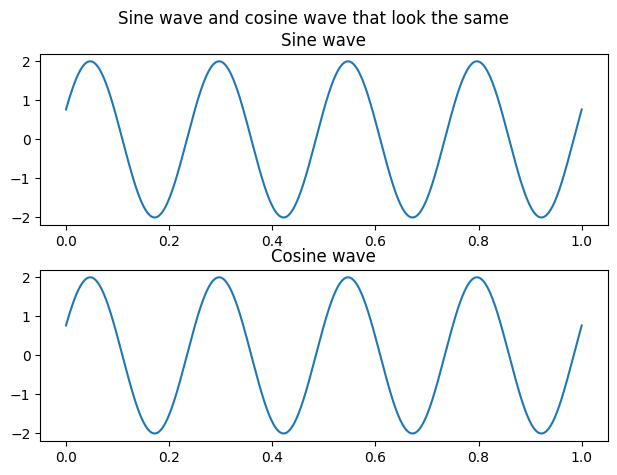

In [2]:
# Ex 1 

amplitude = 2
frequency = 4
phase =  np.pi/8 
sine_wave = lambda t : amplitude * np.sin(2*np.pi*frequency*t + phase)
cosine_wave = lambda t : amplitude * np.cos(2*np.pi*frequency*t + phase - np.pi/2)

fig, axs = plt.subplots(2)
fig.suptitle("Sine wave and cosine wave that look the same")
fig.tight_layout()


time = np.linspace(0,1, 1000)

axs[0].set_title("Sine wave")
axs[0].plot(time, sine_wave(time))
axs[1].set_title("Cosine wave")
axs[1].plot(time, cosine_wave(time))



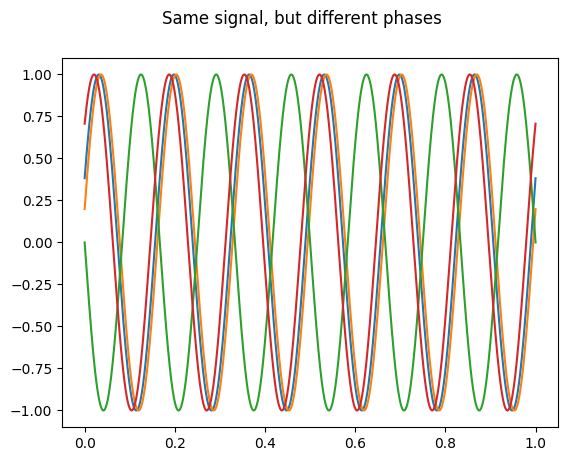

In [3]:
# Ex 2: a)

fig, axs = plt.subplots(1)
fig.suptitle("Same signal, but different phases")

amplitude = 1
frequency = 6
phases = [np.pi/8, 0.2 , np.pi, np.pi/4]
sin_waves = []

for phase in phases:
    sin_waves.append(lambda t, p=phase: amplitude*np.sin(2*np.pi*frequency*t + p))

for wave in sin_waves:
    axs.plot(time, wave(time))


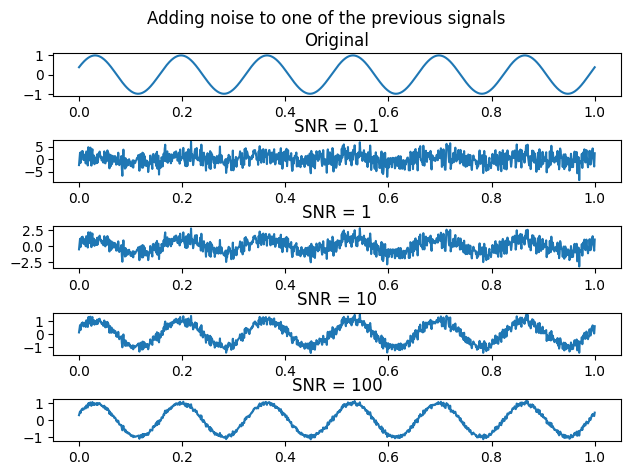

In [4]:
# Ex 2: b)


fig, axs = plt.subplots(5)
fig.suptitle("Adding noise to one of the previous signals")
fig.tight_layout()

wave = sin_waves[0]

# Generating the samples and the noise.
x = wave(time)
z = np.random.normal(size=len(x))

# Computing the squared norm of x and z.
x_norm_squared = np.linalg.norm(x) ** 2 
z_norm_squared = np.linalg.norm(z) ** 2 

# SNR values
snrs = [0.1, 1, 10, 100] 

for index in range(len(snrs)):
    snr = snrs[index]

    # Computing gamma.
    gamma_squared = (x_norm_squared/z_norm_squared) / snr
    gamma = np.sqrt(gamma_squared)

    new_signal = x + gamma*z

    axs[1 + index].set_title(f"SNR = {snr}")
    axs[1 + index].plot(time, new_signal)



axs[0].set_title("Original")
axs[0].plot(time, x)



In [5]:
# Ex 3: a)

# Un semnal sinusoidal de frecventa 400Hz

x = lambda t: np.sin(2*np.pi*t*400)
time = np.linspace(0, 1, num = 3200)
sound = x(time)

sounddevice.play(sound, 3200)


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


In [6]:
# Ex 3: b)

# Un semnal sinusoidal de frecventa 800Hz

x = lambda t: np.sin(2*np.pi*800*t)
time = np.linspace(0, 1, num = 3200)
sound = x(time)

sounddevice.play(sound, 3200)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


In [7]:
# Ex 3: c)
# Un semnal de tip sawtooth de frecventa 240Hz

frequency =  240 
period = 1/frequency
x = lambda t: 2*(t/period- np.floor(1/2+t/period)) 
time = np.linspace(0, 1, num = 3200)

sound = x(time)
sounddevice.play(sound, 3200)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


In [8]:
# Ex 3: d)
# Un semnal de tip square de frecventa 300Hz

frequency = 240 
x = lambda t: 2*(2*np.floor(frequency*t) - np.floor(2* frequency*t)) + 1 
time = np.linspace(0, 1, num = 3200)

sound = x(time)
sounddevice.play(sound, 3200)

# Saving it as .wav
scipy.io.wavfile.write("sound.wav", 3200, sound)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


In [9]:
# Ex 3: d)
# Replaying the sound from disk.

rate, sound =  scipy.io.wavfile.read("sound.wav")
sounddevice.play(sound, rate)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


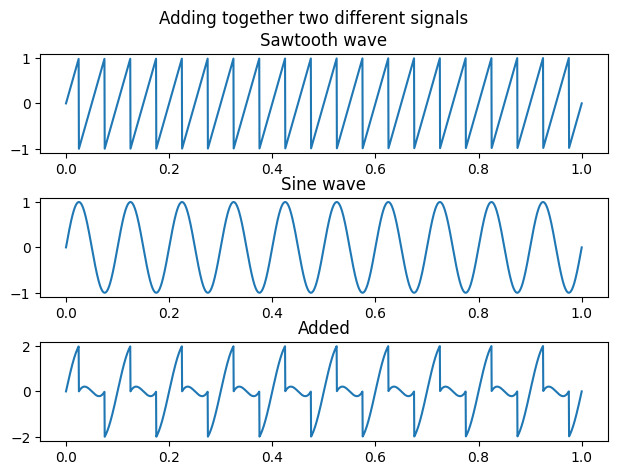

In [10]:
# Ex 4

fig, axs = plt.subplots(3)
fig.suptitle("Adding together two different signals")
fig.tight_layout()

# The sawtooth wave.
sawtooth_frequency = 20 
sawtooth_period = 1/sawtooth_frequency
sawtooth_signal = lambda t: 2*(t/sawtooth_period- np.floor(1/2+t/sawtooth_period)) 

# The sine wave
sine_frequency = 10
sine_signal = lambda t: np.sin(2*np.pi*t*sine_frequency)

time = np.linspace(0, 1, 2000)
sawtooth_samples = sawtooth_signal(time)
sine_samples = sine_signal(time)
added_samples = sawtooth_samples+sine_samples


axs[0].set_title("Sawtooth wave")
axs[0].plot(time, sawtooth_samples)

axs[1].set_title("Sine wave")
axs[1].plot(time, sine_samples)

axs[2].set_title("Added")
axs[2].plot(time, added_samples)


In [11]:
# Ex 5

sine_wave_a = lambda t: np.sin(2 * np.pi* t *800)
sine_wave_b = lambda t: np.sin(2 * np.pi* t *400)

time = np.linspace(0,1, 2**15)
a_samples = sine_wave_a(time)
b_samples = sine_wave_b(time)
concat = np.append(a_samples, b_samples)

sounddevice.play(concat, 2**15)

# We notice that two sounds are played one after another.

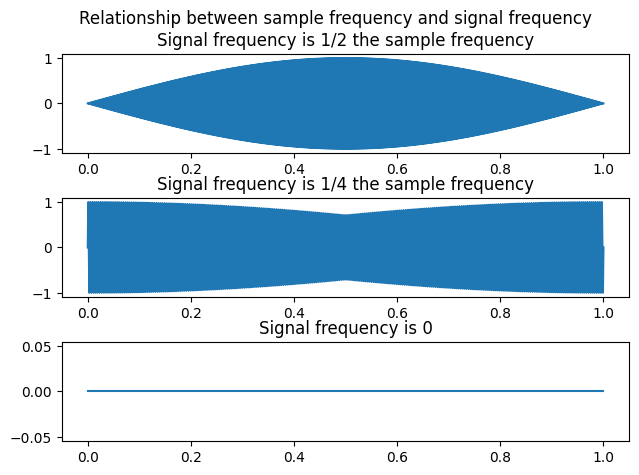

In [12]:
# Ex 6

fig, axs = plt.subplots(3)
fig.suptitle("Relationship between sample frequency and signal frequency")
fig.tight_layout()

sample_frequency = 1000

f1 = sample_frequency/2
f2 = sample_frequency/4
f3 = 0 

x = lambda t: np.sin(2*np.pi*t*f1)
y = lambda t: np.sin(2*np.pi*t*f2)
z = lambda t: np.sin(2*np.pi*t*f3)

time = np.linspace(0, 1, sample_frequency)

axs[0].set_title("Signal frequency is 1/2 the sample frequency")
axs[0].plot(time, x(time))
axs[1].set_title("Signal frequency is 1/4 the sample frequency")
axs[1].plot(time, y(time))
axs[2].set_title("Signal frequency is 0")
axs[2].plot(time, z(time))

# We notice that the sample frequency must be way greater than the 
# signal frequency for the sampled signal to make sense.

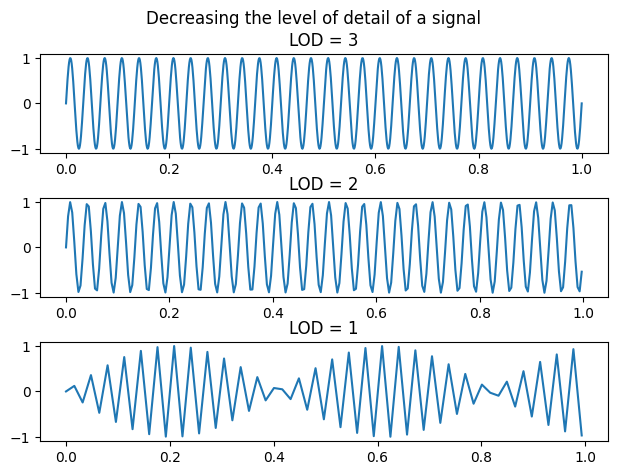

In [25]:
# Ex 7 
fig, axs = plt.subplots(3)
fig.suptitle("Decreasing the level of detail of a signal")
fig.tight_layout()

sample_frequency = 1000
x = lambda t : np.sin(2*np.pi*t*30)

time1 = np.linspace(0, 1, sample_frequency)
samples1 = x(time1)

time2 = np.array([time1[x] for x in range(0, len(time1), 4)])
samples2 = np.array([samples1[x] for x in range(0, len(samples1), 4)])

time3 = np.array([time2[x] for x in range(0, len(time2), 4)])
samples3 = np.array([samples2[x] for x in range(0, len(samples2), 4)])

axs[0].set_title("LOD = 3")
axs[0].plot(time1, samples1)
axs[1].set_title("LOD = 2")
axs[1].plot(time2, samples2)
axs[2].set_title("LOD = 1")
axs[2].plot(time3, samples3)

# We notice that the level of detail decreases as we eliminate samples from the original signal.



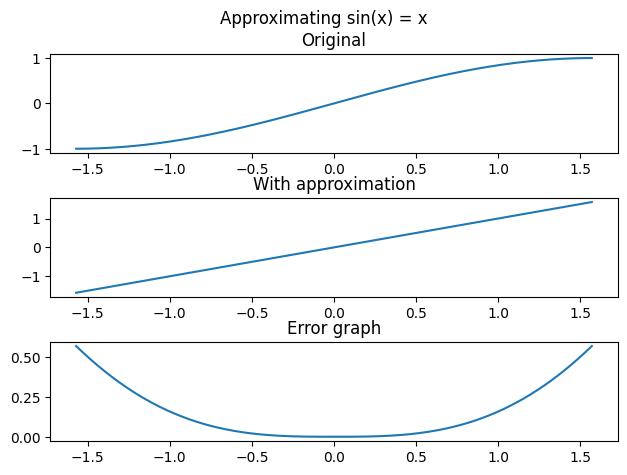

In [263]:
# Ex 8 : a)

fig, axs = plt.subplots(3)
fig.suptitle("Approximating sin(x) = x")
fig.tight_layout()

time = np.linspace(-np.pi/2, np.pi/2, 1000)

sin_wave = lambda t : np.sin(t)
sin_wave_approx = lambda t: t 

sin_wave_samples = sin_wave(time)
sin_wave_approx_samples = sin_wave_approx(time) 
difference_samples = np.abs(sin_wave_samples-sin_wave_approx_samples)

axs[0].set_title("Original")
axs[0].plot(time, sin_wave_samples)
axs[1].set_title("With approximation")
axs[1].plot(time, sin_wave_approx_samples)
axs[2].set_title("Error graph")
axs[2].plot(time, difference_samples)


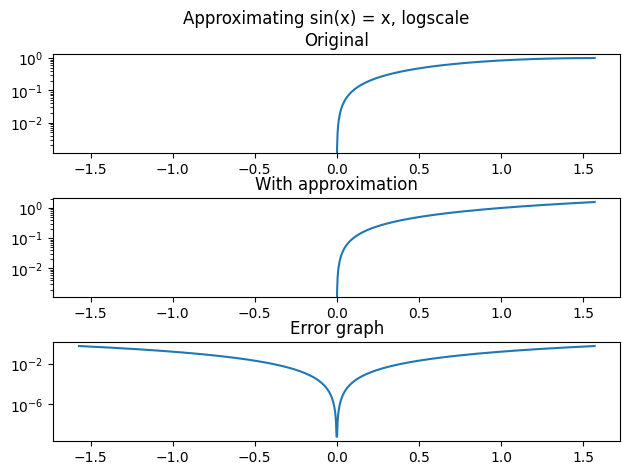

In [264]:
# Ex 8 : a) logscale

fig, axs = plt.subplots(3)
fig.suptitle("Approximating sin(x) = x, logscale")
fig.tight_layout()

time = np.linspace(-np.pi/2, np.pi/2, 1000)

sin_wave = lambda t : np.sin(t)
sin_wave_approx = lambda t: t 

sin_wave_samples = sin_wave(time)
sin_wave_approx_samples = sin_wave_approx(time) 
difference_samples = np.abs(sin_wave_samples-sin_wave_approx_samples)

for ax in axs:
    ax.set_yscale("log")
axs[0].set_title("Original")
axs[0].plot(time, sin_wave_samples)
axs[1].set_title("With approximation")
axs[1].plot(time, sin_wave_approx_samples)
axs[2].set_title("Error graph")
axs[2].plot(time, difference_samples)


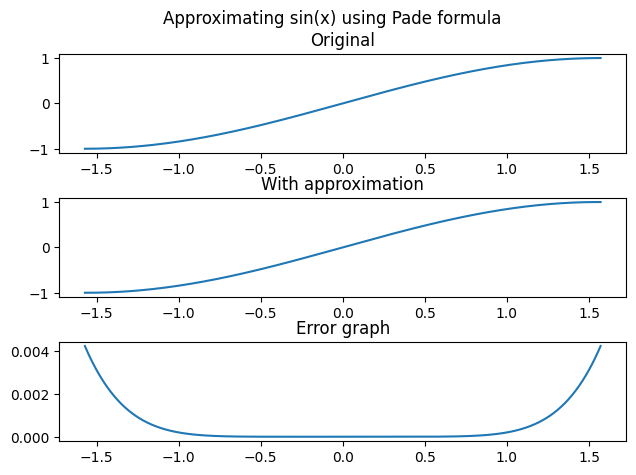

In [250]:
# Ex 8 : b)

def pade(alpha):
    up = alpha - (7/60*alpha**3)
    down = 1 + (1/20* alpha**2)
    return up/down

fig, axs = plt.subplots(3)
fig.suptitle("Approximating sin(x) using Pade formula")
fig.tight_layout()

time = np.linspace(-np.pi/2, np.pi/2, 1000)

sin_wave = lambda t : np.sin(t)
sin_wave_approx = lambda t: pade(t) 

sin_wave_samples = sin_wave(time)
sin_wave_approx_samples = sin_wave_approx(time) 
difference_smaples = np.abs(sin_wave_samples-sin_wave_approx_samples)

axs[0].set_title("Original")
axs[0].plot(time, sin_wave_samples)
axs[1].set_title("With approximation")
axs[1].plot(time, sin_wave_approx_samples)
axs[2].set_title("Error graph")
axs[2].plot(time, difference_smaples)

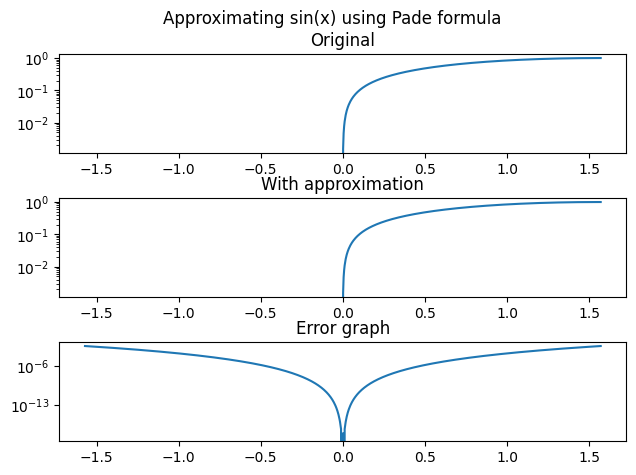

In [265]:
# Ex 8 : b) logscale

def pade(alpha):
    up = alpha - (7/60*alpha**3)
    down = 1 + (1/20* alpha**2)
    return up/down

fig, axs = plt.subplots(3)
fig.suptitle("Approximating sin(x) using Pade formula")
fig.tight_layout()

time = np.linspace(-np.pi/2, np.pi/2, 1000)

sin_wave = lambda t : np.sin(t)
sin_wave_approx = lambda t: pade(t) 

sin_wave_samples = sin_wave(time)
sin_wave_approx_samples = sin_wave_approx(time) 
difference_smaples = np.abs(sin_wave_samples-sin_wave_approx_samples)

for ax in axs:
    ax.set_yscale("log")

axs[0].set_title("Original")
axs[0].plot(time, sin_wave_samples)
axs[1].set_title("With approximation")
axs[1].plot(time, sin_wave_approx_samples)
axs[2].set_title("Error graph")
axs[2].plot(time, difference_smaples)